### Libs

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium

### Data

In [2]:
#Dados das execuções do AG e do TS

with open('results/exe_ts.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    df_ts_exe = pd.DataFrame(reader, columns=reader.__next__())
    df_ts_exe['Cost'] = df_ts_exe['Cost'].astype(float)

with open('results/exe_ga.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    df_ga_exe = pd.DataFrame(reader, columns=reader.__next__())
    df_ga_exe['Cost'] = df_ga_exe['Cost'].astype(float)

#Dados da melhor execução do AG e do TS
with open('results/best_solutions_ts.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    df_ts_best_solutions = pd.DataFrame(reader, columns=reader.__next__())
    df_ts_best_solutions['y'] = df_ts_best_solutions['y'].astype(float)
    
with open('results/best_solutions_ga.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    df_ga_best_solutions = pd.DataFrame(reader, columns=reader.__next__())
    df_ga_best_solutions['y'] = df_ga_best_solutions['y'].astype(float)


#### TS

##### Melhor de cada execução TS

In [3]:
df_ts_exe

,Solution,Cost
0,"[30, 32, 34, 31, 16, 7, 20, 15, 27, 19, 25, 17...",130387.0
1,"[3, 1, 2, 6, 5, 4, 27, 21, 10, 11, 28, 14, 18,...",130785.8
2,"[16, 14, 18, 33, 29, 31, 34, 32, 35, 30, 3, 1,...",192292.1
3,"[32, 34, 4, 5, 3, 1, 6, 2, 23, 15, 20, 22, 8, ...",131455.4
4,"[22, 24, 17, 25, 19, 12, 27, 23, 15, 7, 20, 16...",130161.6
5,"[30, 32, 31, 29, 33, 16, 3, 1, 6, 2, 5, 4, 15,...",132593.5
6,"[16, 14, 22, 8, 9, 7, 20, 23, 4, 5, 15, 27, 13...",193954.5
7,"[33, 29, 31, 34, 32, 30, 35, 4, 5, 3, 1, 23, 1...",201441.8
8,"[14, 18, 28, 22, 10, 11, 21, 26, 12, 25, 19, 2...",130065.2
9,"[23, 7, 20, 3, 1, 2, 6, 5, 4, 13, 19, 25, 24, ...",133482.3


##### Melhor execução TS

In [4]:
print(f'Melhores soluções do Tabu Search:')
display(df_ts_best_solutions)
index_ts = df_ts_best_solutions.loc[df_ts_best_solutions["y"] == df_ts_best_solutions["y"].min()].index
print(f'Melhor(res) solução(ões) apresentada(s) no(s) índece(s):\n{index_ts.astype(int).tolist()}')

Melhores soluções do Tabu Search:


,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,y
0,34,15,17,25,14,30,22,10,19,16,...,1,29,32,7,35,33,27,31,9,311986.6
1,34,15,17,25,14,30,22,10,19,16,...,1,29,32,7,35,33,27,31,9,302305.5
2,34,15,17,25,14,30,22,10,19,16,...,8,29,32,7,35,33,27,31,9,229786.8
3,7,15,17,25,14,30,22,10,19,16,...,8,29,32,34,35,33,27,31,9,223373.4
4,7,15,17,25,14,27,22,10,19,16,...,8,29,32,34,35,33,30,31,9,218419.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,14,18,28,22,10,11,21,26,12,25,...,33,29,31,34,32,30,35,8,9,130065.2
196,14,18,28,22,10,11,21,26,12,25,...,33,29,31,34,32,30,35,8,9,130065.2
197,14,18,28,22,10,11,21,26,12,25,...,33,29,31,34,32,30,35,8,9,130065.2
198,14,18,28,22,10,11,21,26,12,25,...,33,29,31,34,32,30,35,8,9,130065.2


Melhor(res) solução(ões) apresentada(s) no(s) índece(s):
[142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]


#### GA

##### Melhor de cada execução GA

In [5]:
df_ga_exe

,Solution,Cost
0,[26 20 11 18 33 29 2 1 5 4 16 31 32 21 28 ...,232910.6
1,[35 16 5 29 20 19 28 15 23 17 24 27 31 18 12 ...,226048.4
2,[17 21 28 27 7 10 13 30 35 8 3 32 31 26 4 ...,232389.9
3,"[10, 9, 19, 22, 14, 13, 32, 34, 29, 16, 33, 23...",174863.4
4,[17 32 33 8 25 23 26 24 29 18 22 21 35 13 27 ...,176930.0
5,[10 13 29 28 31 15 24 22 18 33 25 26 14 17 7 ...,230843.7
6,[ 4 29 9 24 10 25 26 23 22 11 17 32 19 12 16 ...,229897.4
7,[18 1 26 14 16 7 3 6 2 4 5 30 35 17 27 ...,226418.5
8,"[29, 31, 32, 9, 17, 20, 15, 13, 33, 8, 24, 11,...",232827.2
9,[22 33 14 28 31 6 2 3 8 20 27 23 32 34 35 ...,229986.1


##### Melhor execução GA

In [6]:
print(f'Melhores soluções do Algoritmo Genético:')
display(df_ga_best_solutions)
index_ga = df_ga_best_solutions.loc[df_ga_best_solutions["y"] == df_ga_best_solutions["y"].min()].index
print(f'Melhor(res) solução(ões) apresentada(s) no(s) índece(s):\n{index_ga.astype(int).tolist()}')

Melhores soluções do Algoritmo Genético:


,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,y
0,28,26,7,14,9,29,12,13,23,33,...,17,34,4,3,21,20,10,32,18,314045.1
1,7,14,15,27,11,20,29,16,28,12,...,21,26,2,1,35,9,13,30,34,308142.7
2,7,14,15,27,11,20,29,16,28,12,...,21,26,2,1,35,9,13,30,34,308142.7
3,3,6,1,2,12,19,26,35,33,14,...,18,28,11,30,32,24,34,5,7,291836.0
4,3,6,1,2,12,19,26,35,33,14,...,18,28,11,30,32,24,34,5,7,291836.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,10,9,19,22,14,13,32,34,29,16,...,30,35,7,28,26,15,27,17,20,174863.4
196,10,9,19,22,14,13,32,34,29,16,...,30,35,7,28,26,15,27,17,20,174863.4
197,10,9,19,22,14,13,32,34,29,16,...,30,35,7,28,26,15,27,17,20,174863.4
198,10,9,19,22,14,13,32,34,29,16,...,30,35,7,28,26,15,27,17,20,174863.4


Melhor(res) solução(ões) apresentada(s) no(s) índece(s):
[168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]


### Analysis

##### Average Result

In [7]:
df_average = pd.DataFrame(columns=['mean','std'], index=['TS','GA'])
df_average.loc['TS'] = [df_ts_exe['Cost'].mean(), df_ts_exe['Cost'].std()]
df_average.loc['GA'] = [df_ga_exe['Cost'].mean(), df_ga_exe['Cost'].std()]

print(f'Soluções médias:')
df_average

Soluções médias:


,mean,std
TS,150661.92,31317.431532
GA,219311.52,23010.564292


##### Graphic convergence (Best execution)

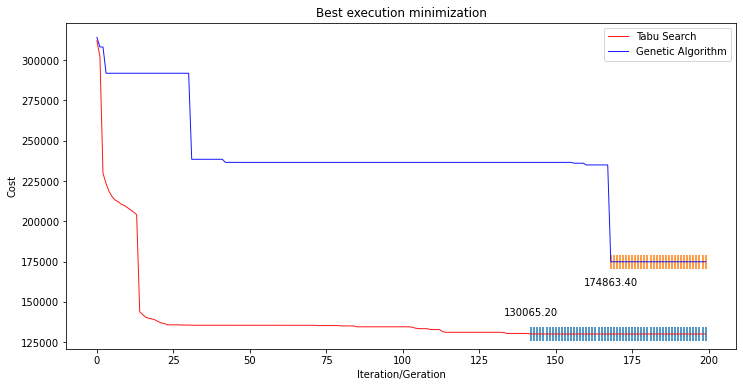

In [8]:
#Convergência na melhor execução
x = np.arange(0, 200, 1)
y1 = df_ts_best_solutions["y"].values
y2 = df_ga_best_solutions["y"].values

fig, ax = plt.subplots()
fig.set_size_inches(12,6)
lines = ax.plot(x, y1, color='red', lw=1, alpha=0.9)
ax.plot(x, y2, color='blue', lw=1, alpha=0.9)
ax.set_title('Best execution minimization')
ax.set_xlabel('Iteration/Geration')
ax.set_ylabel('Cost')
best1 = df_ts_best_solutions.loc[df_ts_best_solutions["y"] == df_ts_best_solutions["y"].min()]["y"].values
best2 = df_ga_best_solutions.loc[df_ga_best_solutions["y"] == df_ga_best_solutions["y"].min()]["y"].values
index_min1 = df_ts_best_solutions.loc[df_ts_best_solutions["y"] == df_ts_best_solutions["y"].min()].index
index_min2 = df_ga_best_solutions.loc[df_ga_best_solutions["y"] == df_ga_best_solutions["y"].min()].index
ax.scatter(index_min1, best1, marker='|', s=200)
ax.scatter(index_min2, best2, marker='|', s=200)
ax.annotate(f'{best1[0]:.2f}', (index_min1[0], best1[0]), xytext=(index_min1[0], best1[0]+10000), ha='center', va='bottom')
ax.annotate(f'{best2[0]:.2f}', (index_min2[0], best2[0]), xytext=(index_min2[0], best2[0]-10000), ha='center', va='top')
ax.legend(['Tabu Search', 'Genetic Algorithm'])
plt.savefig('results/graphic_comparaion_convergence', dpi = 300)
plt.show()